<a href="https://colab.research.google.com/github/akshitgupta/User_churn_prediction/blob/main/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries and load data




In [ ]:
import pandas as pd
import numpy as np

features_data = pd.read_csv('features_data.csv')
equity_value_data = pd.read_csv('equity_value_data.csv')



In [ ]:
equity_value_data.head()

,timestamp,close_equity,user_id
0,2016-11-16T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
1,2016-11-17T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
2,2016-11-18T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
3,2016-11-21T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
4,2016-11-22T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03


Converting timestamp from string to datetime format

In [ ]:
def func(a):
  a=a.split("T")
  return a[0]
equity_value_data['timestamp']= equity_value_data.timestamp.apply(func)
equity_value_data['timestamp']=pd.to_datetime(equity_value_data['timestamp'])
equity_value_data.head()

,timestamp,close_equity,user_id
0,2016-11-16,48.16,bcef4fa9b0bdf22bcf7deae708decf03
1,2016-11-17,48.16,bcef4fa9b0bdf22bcf7deae708decf03
2,2016-11-18,48.16,bcef4fa9b0bdf22bcf7deae708decf03
3,2016-11-21,48.16,bcef4fa9b0bdf22bcf7deae708decf03
4,2016-11-22,48.16,bcef4fa9b0bdf22bcf7deae708decf03


Checking unique users

In [ ]:
a=list(equity_value_data.user_id.unique())
len(a)

5584

Calculating timestamp difference between consecutive rows per user

In [ ]:
equity_value_data['timestamp_dif'] = np.where(equity_value_data['user_id'] == equity_value_data['user_id'].shift(1), equity_value_data.timestamp.diff(), 0)
equity_value_data.head()

,timestamp,close_equity,user_id,timestamp_dif
0,2016-11-16,48.16,bcef4fa9b0bdf22bcf7deae708decf03,0 days
1,2016-11-17,48.16,bcef4fa9b0bdf22bcf7deae708decf03,1 days
2,2016-11-18,48.16,bcef4fa9b0bdf22bcf7deae708decf03,1 days
3,2016-11-21,48.16,bcef4fa9b0bdf22bcf7deae708decf03,3 days
4,2016-11-22,48.16,bcef4fa9b0bdf22bcf7deae708decf03,1 days


Finding churned users

In [ ]:
df=equity_value_data.groupby('user_id')
k=equity_value_data.groupby(['user_id'], sort=False)['timestamp_dif'].max()
k1 = pd.DataFrame(k).reset_index()
k1['new_dt'] = k1['timestamp_dif']/np.timedelta64(1,'D')
churn_mbrs = k1[k1['new_dt']>=28]

In [ ]:
churn_mbrs.head(5)

,user_id,timestamp_dif,new_dt
38,270cda53a026bcf6c2b98492b23c1b99,73 days,73.0
39,319c069e77187c7e7e7c027eb00fd941,126 days,126.0
40,ec84f134c5b27c4f5702803e98eb3f40,36 days,36.0
49,6dbedf7f2972b4f6ea60a15d48cb292c,60 days,60.0
54,91837d41270b81b267fc205c3e03ee9b,49 days,49.0


#Appending churned column to features_data set 
##User who has churned will be denoted by 1
##User who has not churned will be denoted by 0

In [ ]:
churn_mbrs_list=list(churn_mbrs['user_id'])
churned_header_list = []
for i in range(len(features_data['user_id'])):
  if features_data['user_id'][i] in churn_mbrs_list:
    churned_header_list.append(1)
  else:
    churned_header_list.append(0)
print(churned_header_list)
features_data['churned'] = churned_header_list
features_data.to_csv(r'features_data_with_churned.csv')


[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

#Checking different values under each feature

In [ ]:
features_data = pd.read_csv('features_data_with_churned.csv')
features_data.head(5)

,Unnamed: 0,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,user_id,churned
0,0,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,33.129417,stock,40.0,med_time_horizon,895044c23edc821881e87da749c01034,0
1,1,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,16.573517,stock,200.0,short_time_horizon,458b1d95441ced242949deefe8e4b638,0
2,2,med_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,10.008367,stock,25.0,long_time_horizon,c7936f653d293479e034865db9bb932f,0
3,3,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,1.031633,stock,100.0,short_time_horizon,b255d4bd6c9ba194d3a350b3e76c6393,0
4,4,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,8.187250,stock,20.0,long_time_horizon,4a168225e89375b8de605cbc0977ae91,0


In [ ]:
features_data.drop('Unnamed: 0', axis=1, inplace=True)
for col in features_data.columns:
  a = set(features_data[col])
  print(col,':',len(a),':',a)
  print()

risk_tolerance : 3 : {'low_risk_tolerance', 'med_risk_tolerance', 'high_risk_tolerance'}

investment_experience : 4 : {'extensive_investment_exp', 'good_investment_exp', 'limited_investment_exp', 'no_investment_exp'}

liquidity_needs : 3 : {'somewhat_important_liq_need', 'not_important_liq_need', 'very_important_liq_need'}

platform : 3 : {'both', 'Android', 'iOS'}

time_spent : 4502 : {0.0, 1.01905, 2.46021666667, 1.2806833333299998, 4.18543333333, 5.20513333333, 6.82161666667, 6.637083333330001, 8.54966666667, 9.4436, 10.008366666699999, 11.7253333333, 12.351966666700001, 10.6102666667, 12.248166666700001, 13.552966666700001, 16.5735166667, 17.97345, 18.1116166667, 19.8825, 19.1435833333, 21.4719833333, 20.4975666667, 23.1584, 19.709433333299998, 19.799566666700002, 21.737033333299998, 23.1141333333, 28.9948833333, 25.6489666667, 30.7100833333, 31.177433333299998, 31.5684333333, 33.1294166667, 33.3147333333, 35.7030833333, 35.1944333333, 33.7029166667, 36.2691166667, 37.3352, 40.5918

#Encoding features

In [ ]:
# One hot encoding
from sklearn.preprocessing import OneHotEncoder

def enc(feature,features_data):
  enc = OneHotEncoder()


# tranforming the column after fitting
  enc = enc.fit_transform(features_data[[feature]]).toarray()


# converting arrays to a dataframe
  encoded_colm = pd.DataFrame(enc)


# concating dataframes 
  features_data = pd.concat([features_data, encoded_colm], axis = 1) 


# removing the encoded column.
  features_data = features_data.drop([feature], axis = 1) 
  return features_data

In [ ]:
feature_list=[]
for col in features_data.columns:
  if col=='churned':
    continue
  a = set(features_data[col])
  if len(a)<20:
    feature_list.append(col)
for i in feature_list:
  features_data = enc(i,features_data)
features_data.head(5)

,time_spent,first_deposit_amount,user_id,churned,0,1,2,0,1,2,3,0,1,2,0,1,2,0,1,2,3,4,5,6,7,8,9,10,0,1,2
0,33.129417,40.0,895044c23edc821881e87da749c01034,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,16.573517,200.0,458b1d95441ced242949deefe8e4b638,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,10.008367,25.0,c7936f653d293479e034865db9bb932f,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.031633,100.0,b255d4bd6c9ba194d3a350b3e76c6393,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,8.187250,20.0,4a168225e89375b8de605cbc0977ae91,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:

features_data.to_csv(r"features_data_with_numbers.csv")

#Building model

##KNN Model


In [ ]:
features_data_df = pd.read_csv('features_data_with_numbers.csv')
features_data_df.drop('Unnamed: 0', axis=1, inplace=True)
features_data_df.drop('user_id', axis=1, inplace=True)
features_data_df.head(5)

,time_spent,first_deposit_amount,churned,0,1,2,0.1,1.1,2.1,3,0.2,1.2,2.2,0.3,1.3,2.3,0.4,1.4,2.4,3.1,4,5,6,7,8,9,10,0.5,1.5,2.5
0,33.129417,40.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,16.573517,200.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,10.008367,25.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.031633,100.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,8.187250,20.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


#Spliting dataset into attributes and labels

In [ ]:
import matplotlib.pyplot as plt
y = features_data_df['churned'].values
X = features_data_df
X.drop('churned', axis=1, inplace=True)
X = X.iloc[:, :].values

In [ ]:
np.unique(y)

array([0, 1])

#Taking care of unbalanced dataset using SMOTE and RandomUnderSampler

###Note: I initially ran model without SMOTE but due to unbalanced dataset, we were getting very low performance by our model

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
over = SMOTE(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#Test-Train split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

#Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Using error curves to find best k for our model

Text(0, 0.5, 'Mean Error')

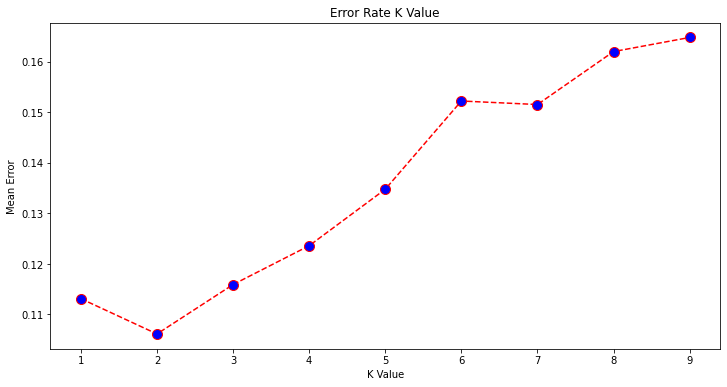

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

#Training and Predictions

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

#Model evaluation

In [ ]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[946  19]
 [133 334]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       965
           1       0.95      0.72      0.81       467

    accuracy                           0.89      1432
   macro avg       0.91      0.85      0.87      1432
weighted avg       0.90      0.89      0.89      1432



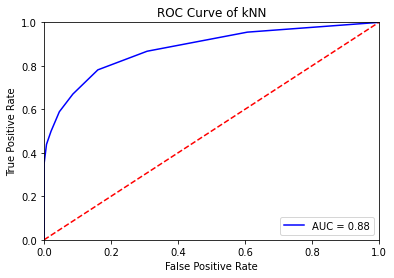

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

#Parameter Tuning using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 10)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
y_pred = knn_gscv.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[883  82]
 [ 80 387]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       965
           1       0.83      0.83      0.83       467

    accuracy                           0.89      1432
   macro avg       0.87      0.87      0.87      1432
weighted avg       0.89      0.89      0.89      1432



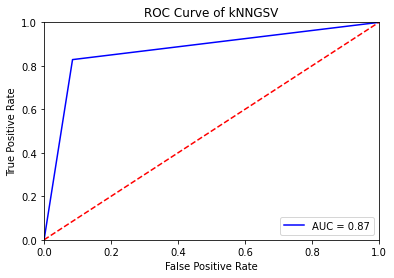

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_scores = knn_gscv.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNNGSV')
plt.show()

#RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(class_weight='balanced')
classifier2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = classifier2.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[946  19]
 [ 85 382]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       965
           1       0.95      0.82      0.88       467

    accuracy                           0.93      1432
   macro avg       0.94      0.90      0.91      1432
weighted avg       0.93      0.93      0.93      1432



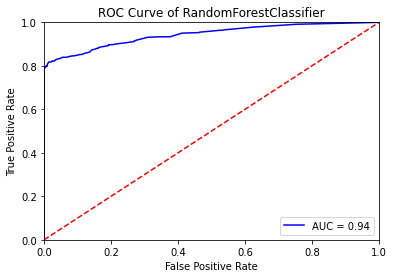

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_scores = classifier2.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of RandomForestClassifier')
plt.show()

#Checking Important feature with help of decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,max_depth=4)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
from sklearn import tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 0.87
|   |--- feature_2 <= -1.26
|   |   |--- feature_1 <= -0.31
|   |   |   |--- feature_28 <= 1.01
|   |   |   |   |--- class: 1
|   |   |   |--- feature_28 >  1.01
|   |   |   |   |--- class: 0
|   |   |--- feature_1 >  -0.31
|   |   |   |--- feature_11 <= 0.60
|   |   |   |   |--- class: 0
|   |   |   |--- feature_11 >  0.60
|   |   |   |   |--- class: 0
|   |--- feature_2 >  -1.26
|   |   |--- class: 1
|--- feature_2 >  0.87
|   |--- feature_28 <= -1.08
|   |   |--- feature_18 <= -0.22
|   |   |   |--- feature_6 <= -0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_6 >  -0.50
|   |   |   |   |--- class: 0
|   |   |--- feature_18 >  -0.22
|   |   |   |--- feature_23 <= -2.41
|   |   |   |   |--- class: 0
|   |   |   |--- feature_23 >  -2.41
|   |   |   |   |--- class: 1
|   |--- feature_28 >  -1.08
|   |   |--- feature_28 <= 1.02
|   |   |   |--- class: 1
|   |   |--- feature_28 >  1.02
|   |   |   |--- feature_13 <= -0.32
|   |   |   |   |--- class: 0
|

#Code for checking correlation and distribution

Plotting correlation matrix 

#Plotting distribution for feature having highest correlation with churn 

In [ ]:
features_data1 = pd.read_csv('features_data.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5369c85d0>]],
      dtype=object)

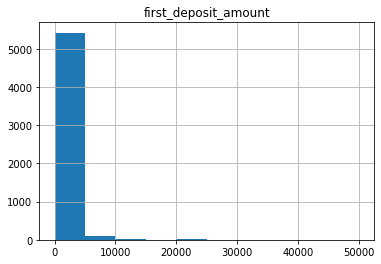

In [ ]:
features_data1.hist(column='first_deposit_amount')